In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### Organizing Data and Getting it Ready for Use in Regression Models

In [5]:
categorical = []
for column in train.columns:
    if isinstance(train[column][0], str):
        categorical.append(column)

In [6]:
for column in train.columns:
    print(type(train[column][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.int6

In [7]:
numeric = []
questionable = []
for column in train.columns:
    if isinstance(train[column][0], np.int64):
        numeric.append(column)
    elif isinstance(train[column][0], np.float64):
        numeric.append(column)
    elif isinstance(train[column][0], float):
        if str(train[column][0]) != 'nan':
            numeric.append(column)
        else:
            questionable.append(column)

In [8]:
del(numeric[37])

In [9]:
del(numeric[0])

In [10]:
questionable

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [11]:
for q in questionable:
    for i in range(len(train[q])):
        if not isinstance(train[q][i], float):
            print(type(train[q][i]), train[q][i], q)
            break

<class 'str'> Grvl Alley
<class 'str'> TA FireplaceQu
<class 'str'> Ex PoolQC
<class 'str'> MnPrv Fence
<class 'str'> Shed MiscFeature


In [12]:
for q in questionable:
    categorical.append(q)

##### Scatterplots with Numeric Features

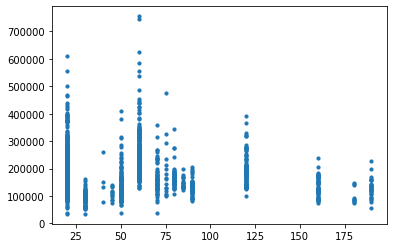

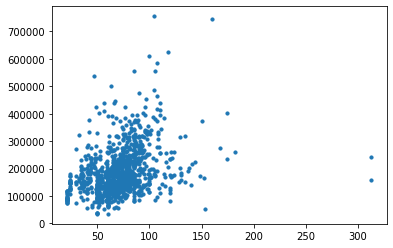

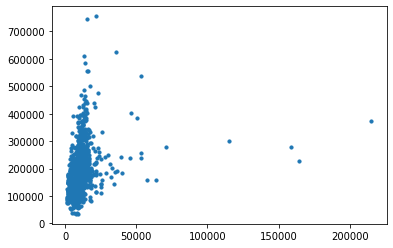

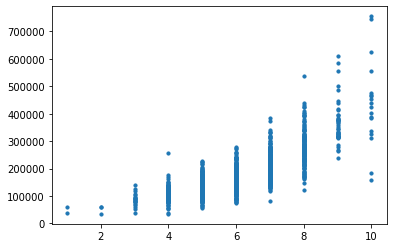

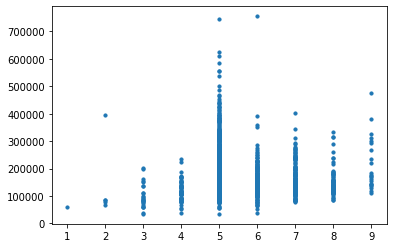

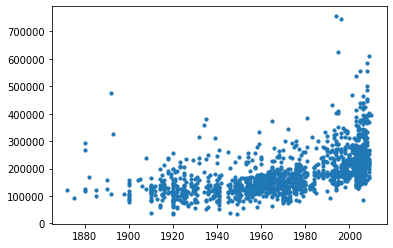

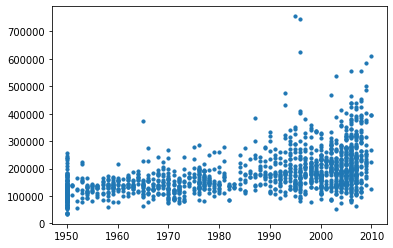

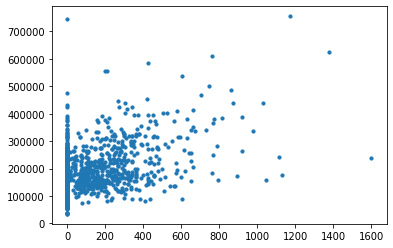

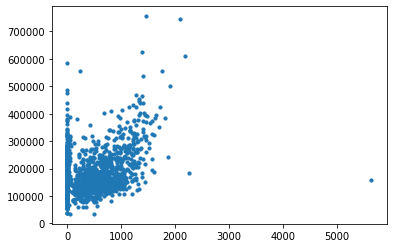

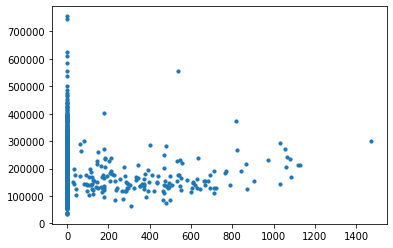

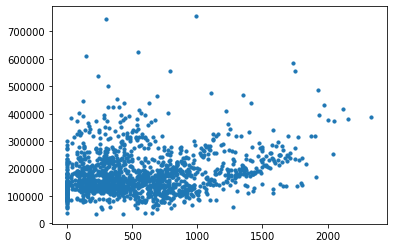

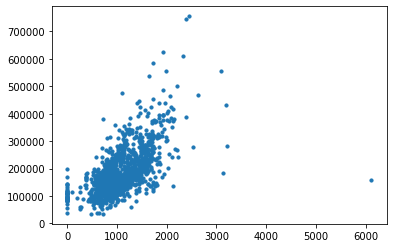

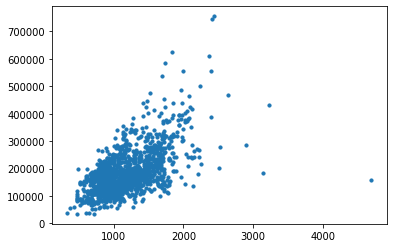

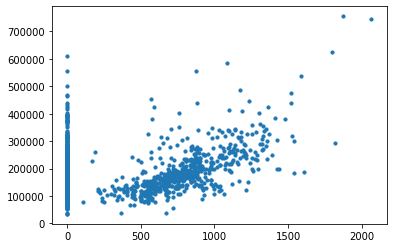

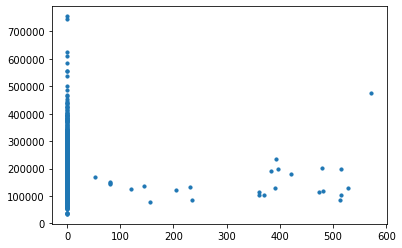

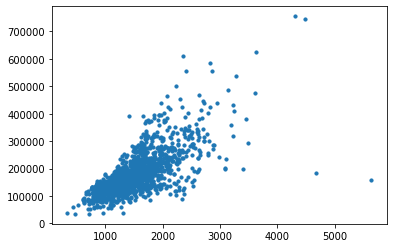

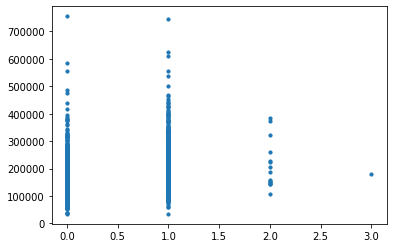

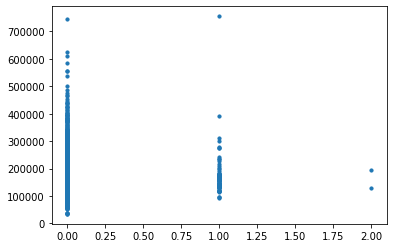

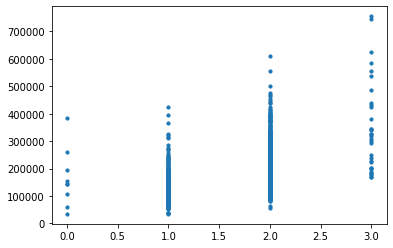

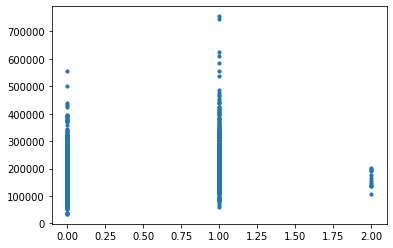

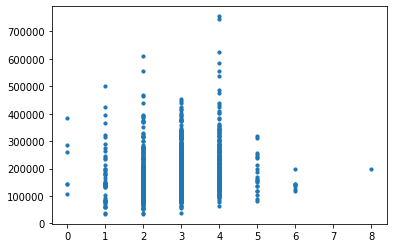

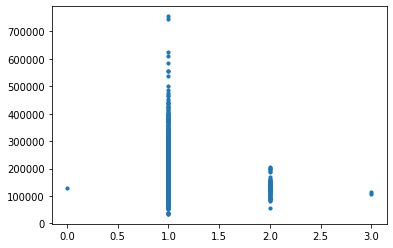

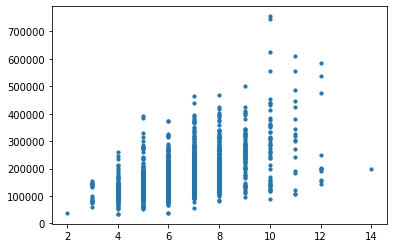

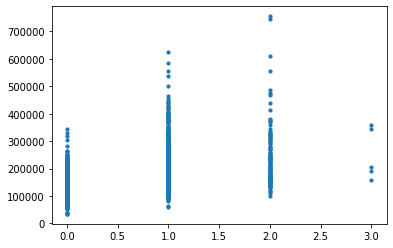

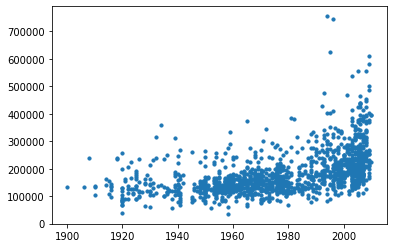

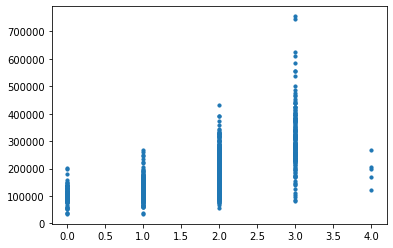

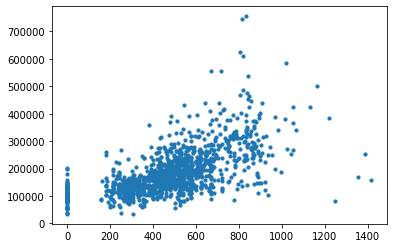

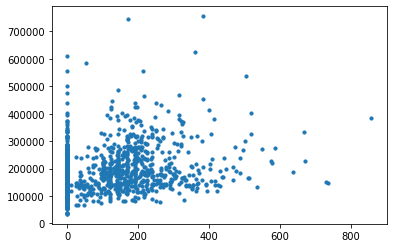

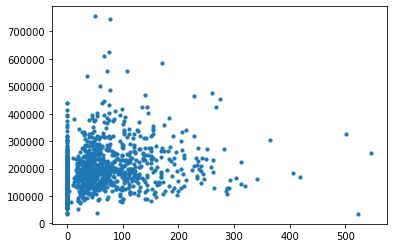

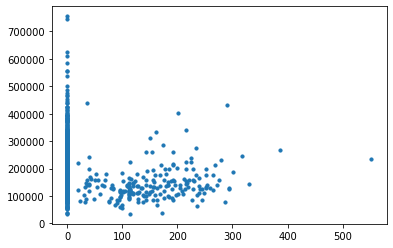

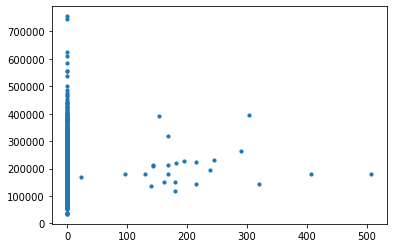

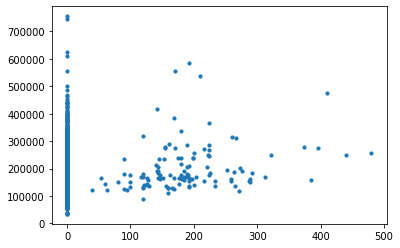

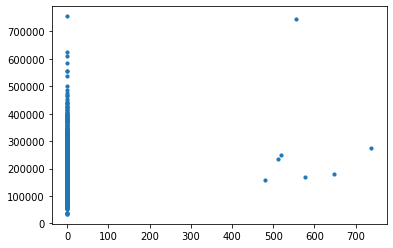

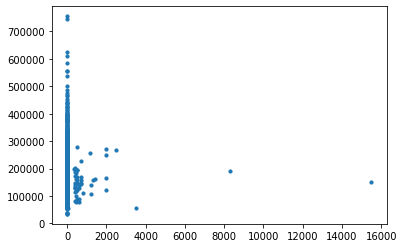

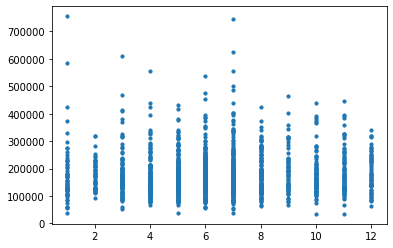

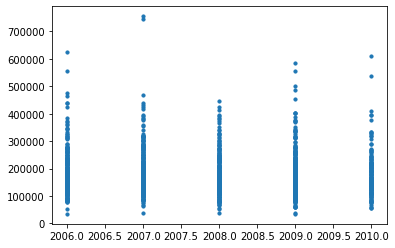

In [13]:
for num in numeric:
    plt.scatter(train[num], train.SalePrice, s = 10)
    plt.show()

##### Histograms with Categorical Features

In [14]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [15]:
np.where(train['MSZoning'] == 'FV')

(array([  47,   56,   87,  105,  115,  158,  180,  212,  240,  256,  270,
         281,  285,  297,  317,  377,  381,  399,  409,  412,  453,  460,
         501,  507,  525,  549,  578,  603,  623,  641,  644,  650,  686,
         687,  699,  755,  758,  762,  824,  829,  831,  864,  875,  885,
         914,  959,  973,  975,  977,  989, 1087, 1089, 1091, 1172, 1191,
        1217, 1246, 1265, 1317, 1358, 1364, 1365, 1374, 1442, 1454]),)

In [16]:
where = np.where(train['MSZoning'] == 'RM')
for i in where:
    print(train.SalePrice[i])

8       129900
15      132000
21      139400
23      129900
29       68500
         ...  
1428    119000
1438    149700
1441    149300
1449     92000
1452    145000
Name: SalePrice, Length: 218, dtype: int64


In [17]:
def histogram(category):
    for u in train[category].unique():
        x = []
        where = np.where(train[category] == u)
        for i in where:
            x.append(train.SalePrice[i])
        plt.hist(x, bins = 10, histtype = 'barstacked', density = True, label = u, log = True)
        plt.title(category)
        plt.legend(loc = 'upper right')
    plt.show()

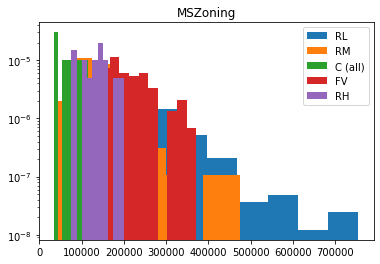

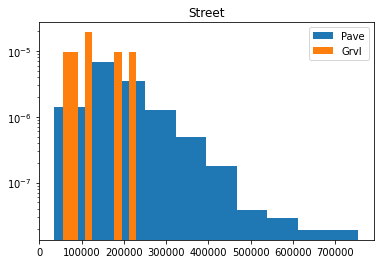

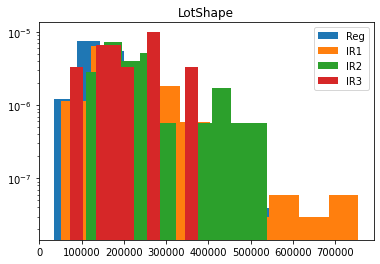

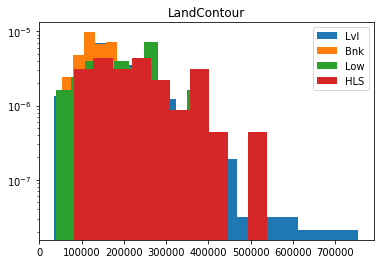

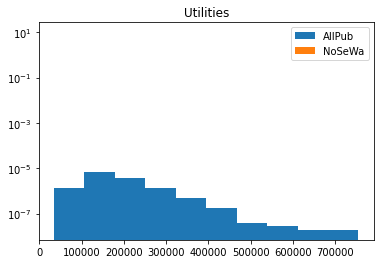

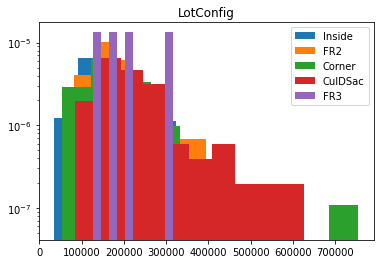

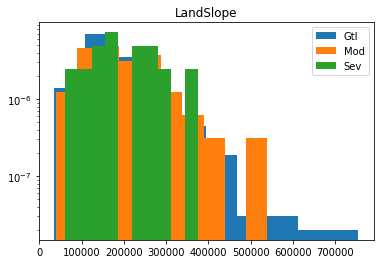

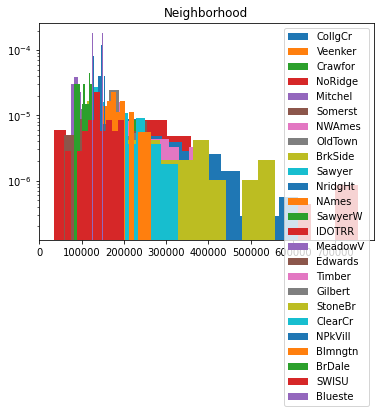

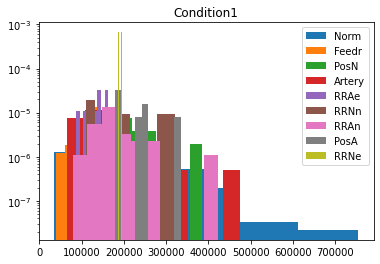

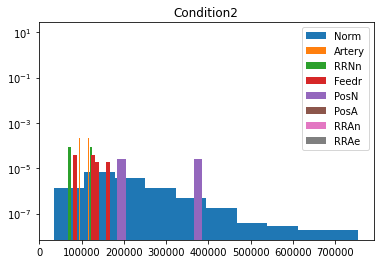

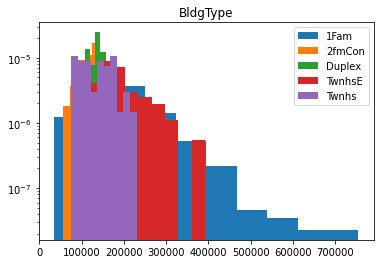

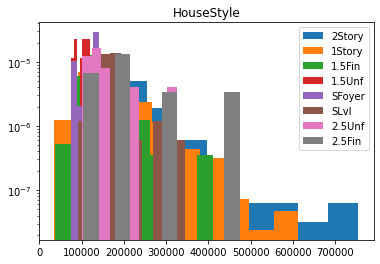

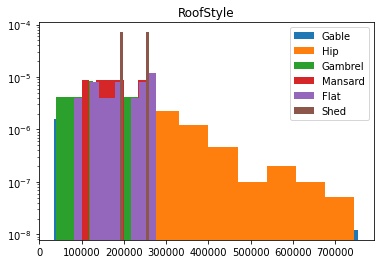

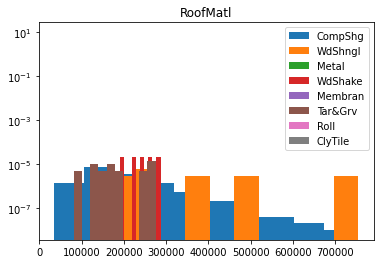

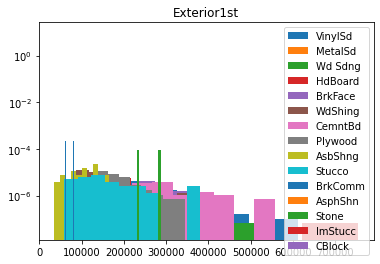

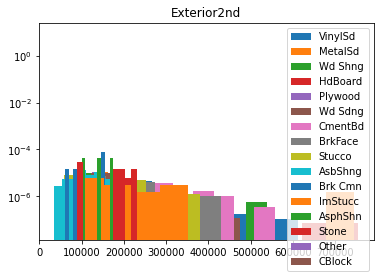

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


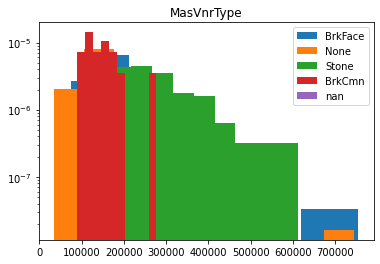

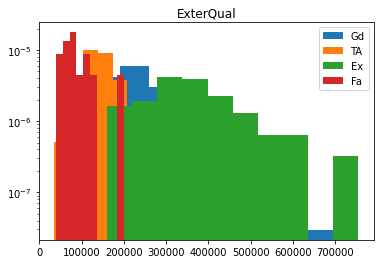

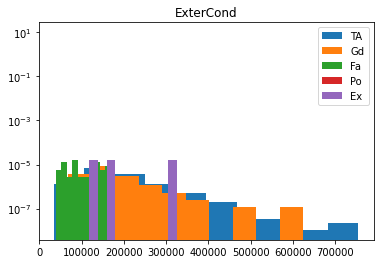

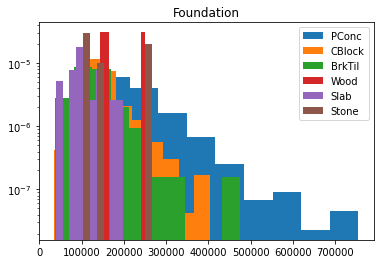

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


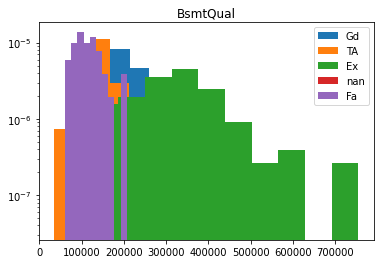

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


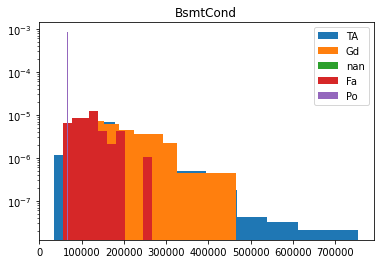

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


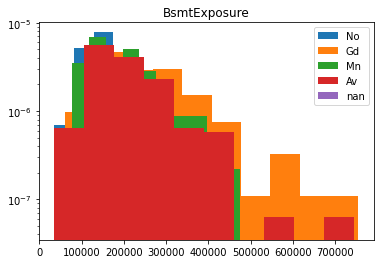

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


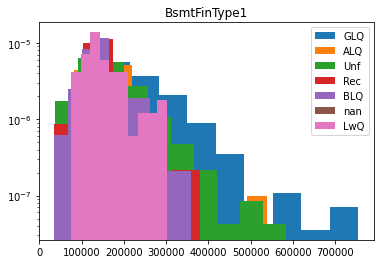

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


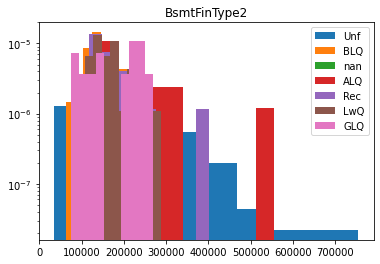

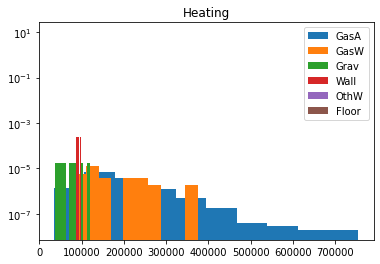

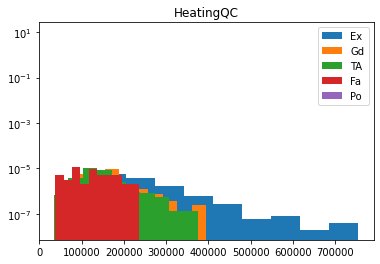

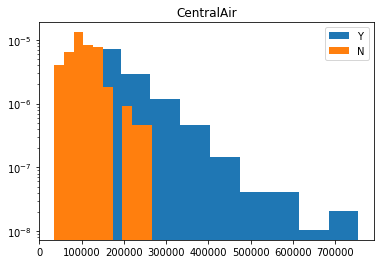

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


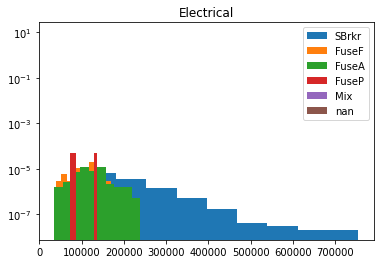

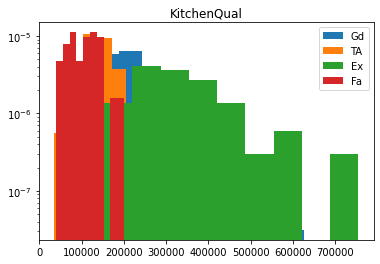

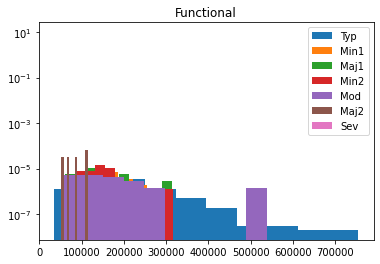

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


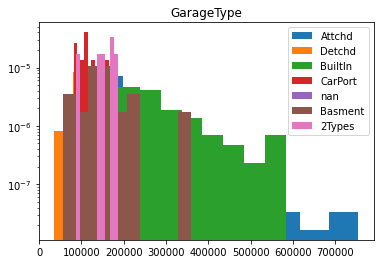

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


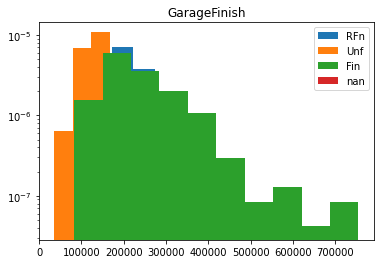

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


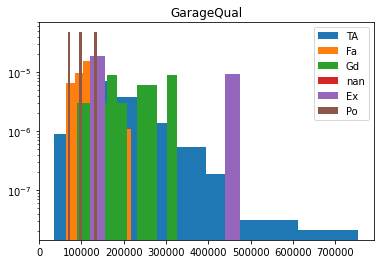

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


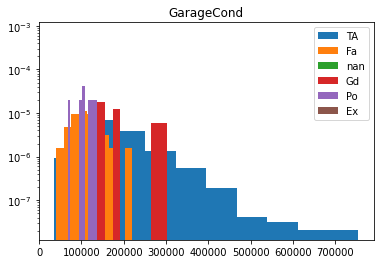

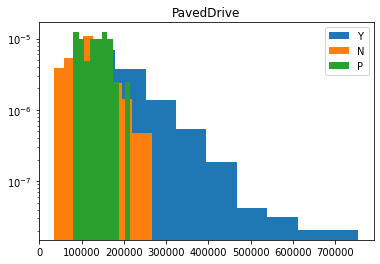

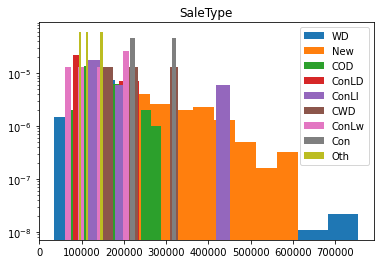

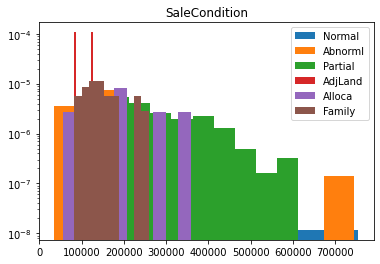

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


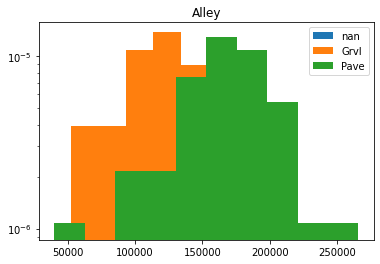

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


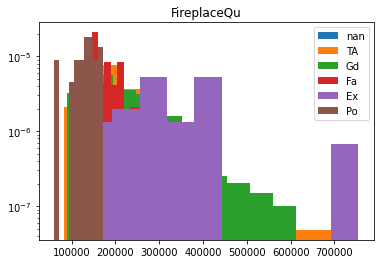

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


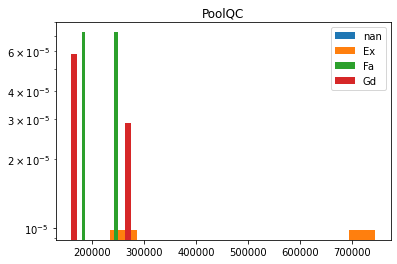

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


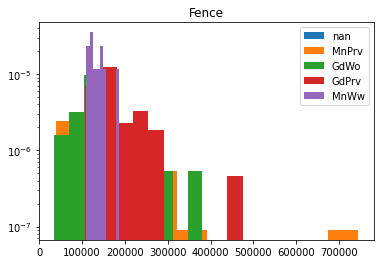

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


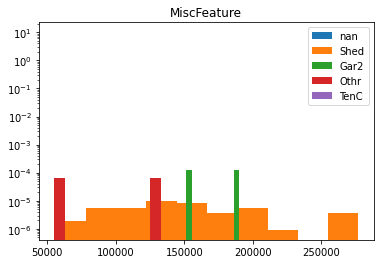

In [18]:
for cat in categorical:
    histogram(cat)

In [19]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [20]:
houseID = train.Id
train = train.drop(columns = 'Id')

In [21]:
features = train.drop(columns = 'SalePrice')
target = train.SalePrice

In [22]:
features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [23]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

##### Checking NaN Columns

In [24]:
nan_list = []
for col in train.columns:
    for i in range(len(train[col])):
        if str(train[col][i]) == 'nan':
            nan_list.append(col)
            break

In [25]:
nan_list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [26]:
counts = []
for n in nan_list:
    nan_count = 0
    for i in train[n]:
        if str(i) == 'nan':
            nan_count +=1
    counts.append(nan_count)

In [27]:
nan_list, counts

(['LotFrontage',
  'Alley',
  'MasVnrType',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Electrical',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PoolQC',
  'Fence',
  'MiscFeature'],
 [259,
  1369,
  8,
  8,
  37,
  37,
  38,
  37,
  38,
  1,
  690,
  81,
  81,
  81,
  81,
  81,
  1453,
  1179,
  1406])

In [28]:
c = 0
for v in train.Alley:
    if str(v) == 'nan':
        c += 1

In [29]:
c2 = 0
for v in train.FireplaceQu:
    if str(v) == 'nan':
        c2 += 1

In [30]:
c3 = 0
for v in train.PoolQC:
    if str(v) == 'nan':
        c3 += 1

In [31]:
c4 = 0
for v in train.Fence:
    if str(v) == 'nan':
        c4 += 1

In [32]:
c5 = 0
for v in train.MiscFeature:
    if str(v) == 'nan':
        c5 += 1

In [33]:
c/1460, c2/1460, c3/1460, c4/1460, c5/1460

(0.9376712328767123,
 0.4726027397260274,
 0.9952054794520548,
 0.8075342465753425,
 0.963013698630137)

##### Dropping These Columns

In [34]:
to_drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [35]:
features.shape

(1460, 79)

In [36]:
for d in to_drop:
    features = features.drop(columns = d)

In [37]:
features.shape

(1460, 74)

In [38]:
nan_cols = [n for n in nan_list if n not in to_drop]

##### Normalizing Numeric Data with MinMaxScaler

In [39]:
for num in numeric:
    features[numeric] = features[numeric].astype(float)

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
scaler.fit(features[numeric])

MinMaxScaler()

In [43]:
features[numeric] = scaler.transform(features[numeric])

In [44]:
features

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,RL,0.150685,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50,WD,Normal
1,0.000000,RL,0.202055,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25,WD,Normal
2,0.235294,RL,0.160959,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50,WD,Normal
3,0.294118,RL,0.133562,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00,WD,Abnorml
4,0.235294,RL,0.215753,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,RL,0.140411,0.030929,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25,WD,Normal
1456,0.000000,RL,0.219178,0.055505,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00,WD,Normal
1457,0.294118,RL,0.154110,0.036187,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00,WD,Normal
1458,0.000000,RL,0.160959,0.039342,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00,WD,Normal


##### Clearing Other NaN Data

In [45]:
for n in nan_cols:
    if n in numeric:
        print(n)

LotFrontage
MasVnrArea
GarageYrBlt


In [46]:
nan_numeric = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [47]:
features.GarageYrBlt

0       0.936364
1       0.690909
2       0.918182
3       0.890909
4       0.909091
          ...   
1455    0.900000
1456    0.709091
1457    0.372727
1458    0.454545
1459    0.590909
Name: GarageYrBlt, Length: 1460, dtype: float64

In [48]:
median_LF, median_MVA, median_GYB = features.LotFrontage.describe()[5], features.MasVnrArea.describe()[5], features.GarageYrBlt.describe()[5]

In [49]:
median_LF, median_MVA, median_GYB

(0.1643835616438356, 0.0, 0.7272727272727266)

In [50]:
nan = train.Alley[0]

In [51]:
count = 0
for i in features.LotFrontage:
    if i == median_LF:
        count += 1

In [52]:
count

11

In [53]:
count = 0
for i in features.LotFrontage:
    if str(i) == 'nan':
        count += 1

In [54]:
count

259

In [55]:
for n in nan_numeric:
    median = features[n].describe()[5]
    features[n] = features[n].replace(to_replace = nan, value = median)

In [56]:
count = 0
for i in features.LotFrontage:
    if str(i) == 'nan':
        count += 1

In [57]:
count

0

In [58]:
count = 0
for i in features.LotFrontage:
    if i == median_LF:
        count += 1

In [59]:
count

270

In [60]:
count = 0
for i in features.MasVnrArea:
    if i == median_MVA:
        count += 1

In [61]:
count

869

In [62]:
count = 0
for i in train.MasVnrArea:
    if i == median_MVA:
        count += 1

In [63]:
count

861

In [64]:
count = 0
for i in features.GarageYrBlt:
    if i == features.GarageYrBlt.describe()[5]:
        count += 1

In [65]:
count

96

In [66]:
features.MSZoning.mode()

0    RL
Name: MSZoning, dtype: object

In [67]:
features.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [68]:
nan_categorical = [n for n in nan_cols if n in categorical]

In [69]:
for n in nan_categorical:
    features[n] = features[n].astype(str)

In [70]:
for n in nan_categorical:
    mode = features[n].mode()[0]
    features[n] = features[n].replace(to_replace = 'nan', value = mode)

In [71]:
nan_categorical

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [72]:
features.BsmtCond.value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [73]:
count = 0
for i in features.BsmtCond:
    if i == features.BsmtCond.mode()[0]:
        count += 1

In [74]:
count

1348

In [75]:
cat_vars = [cat for cat in categorical if cat not in to_drop]

In [76]:
cat_vars

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [77]:
features = pd.get_dummies(features, columns = cat_vars)

In [78]:
features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1456,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,...,0,0,0,1,0,0,0,0,1,0
1457,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0,0,0,1,0,0,0,0,1,0
1458,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,...,0,0,0,1,0,0,0,0,1,0


##### Doing Categorical Log Scale Histograms Over

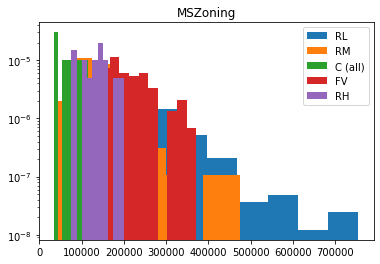

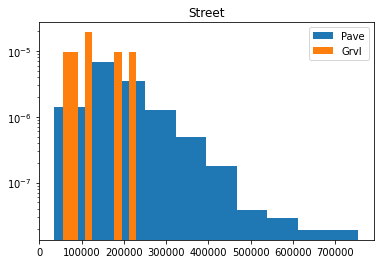

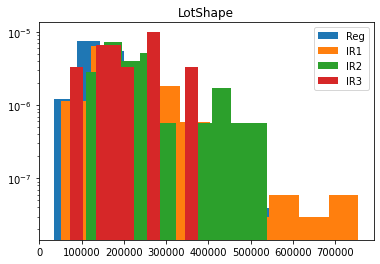

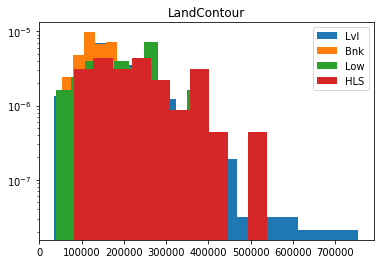

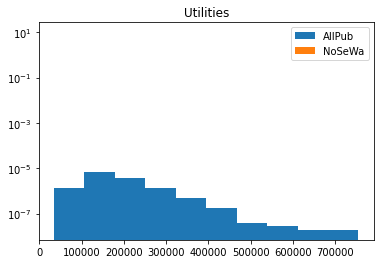

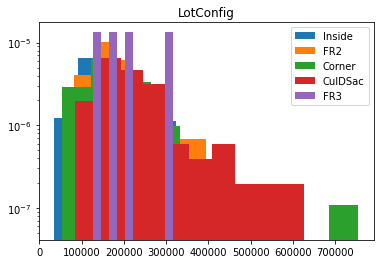

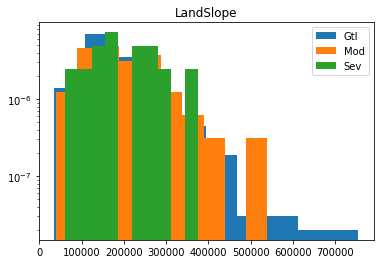

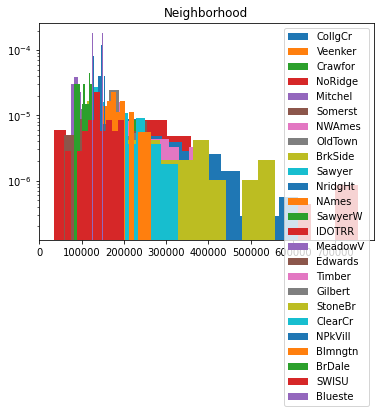

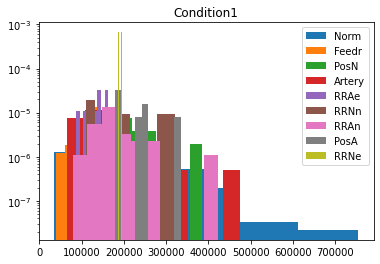

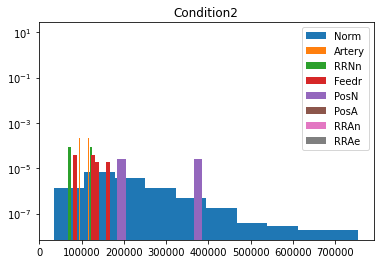

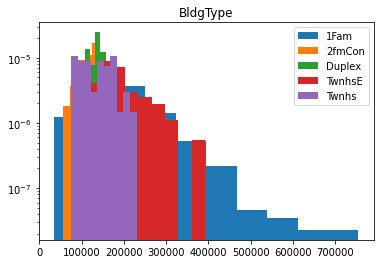

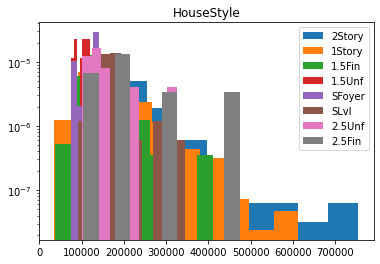

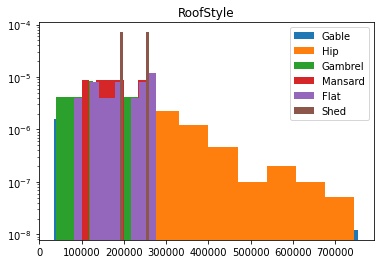

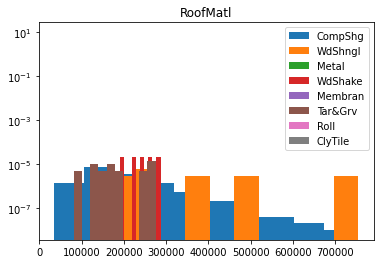

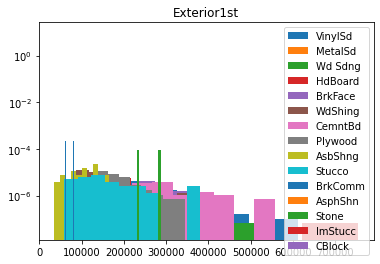

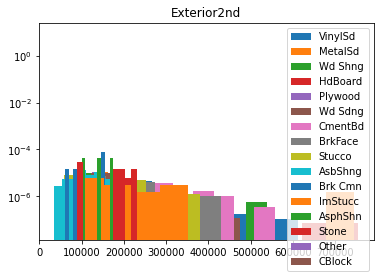

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


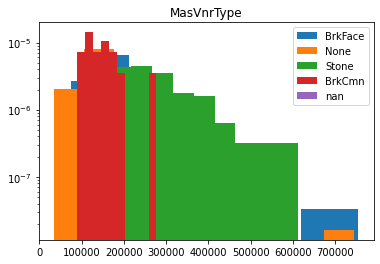

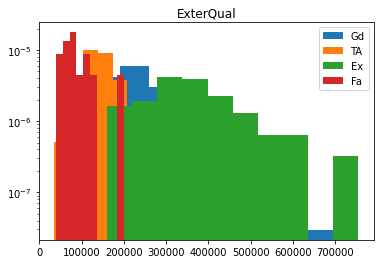

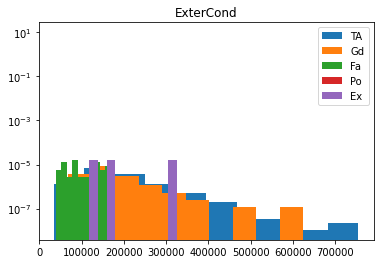

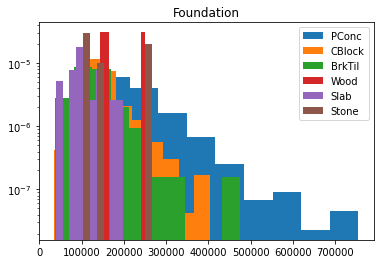

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


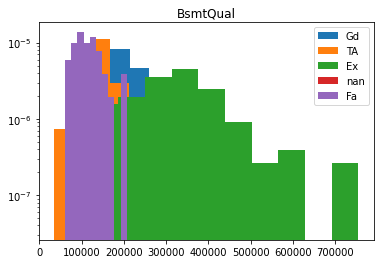

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


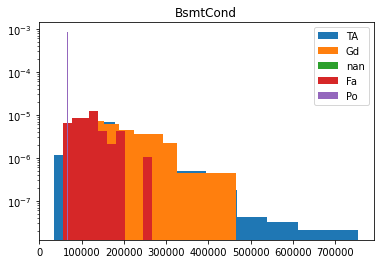

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


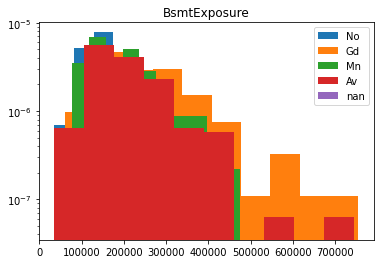

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


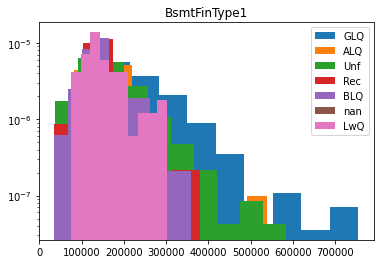

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


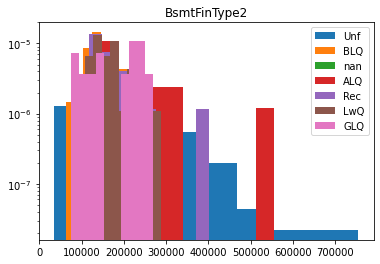

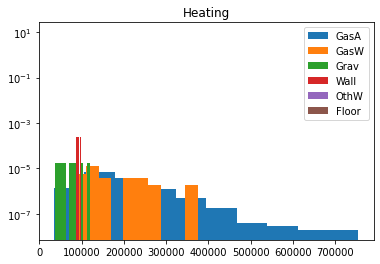

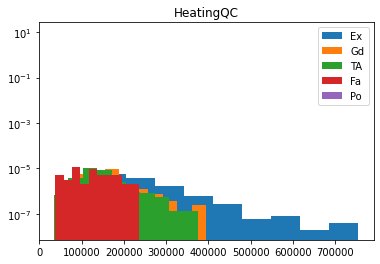

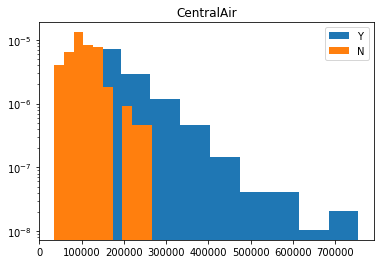

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


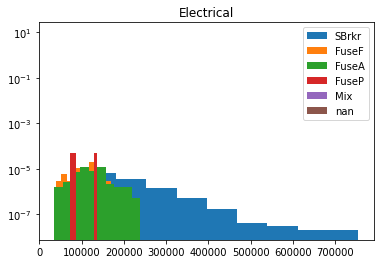

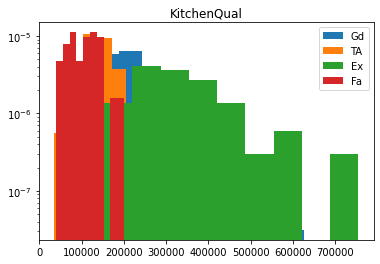

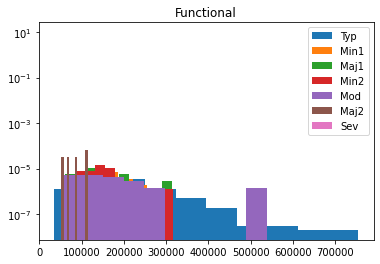

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


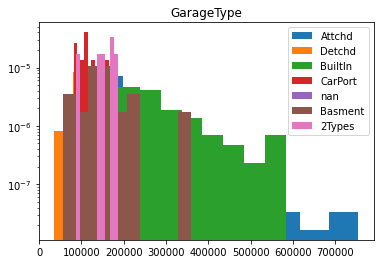

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


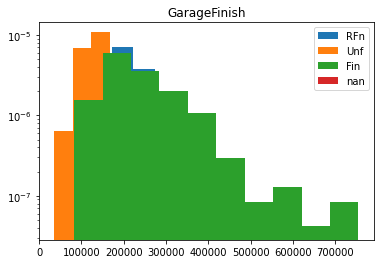

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


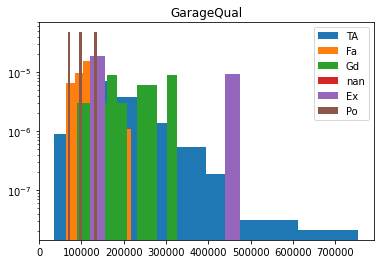

/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


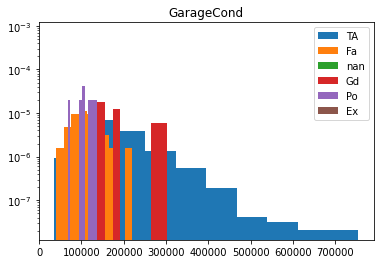

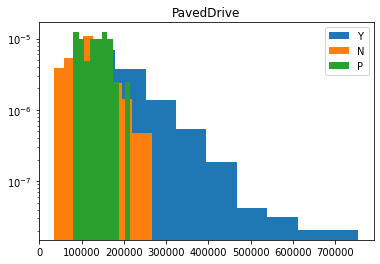

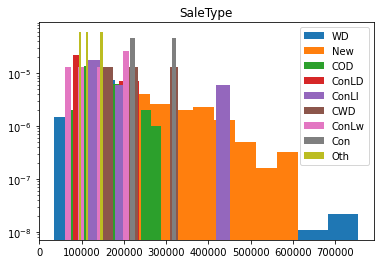

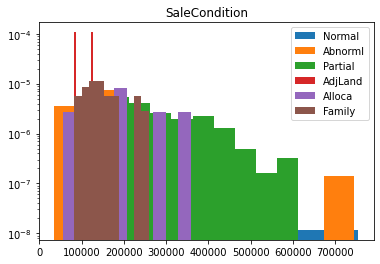

In [79]:
for var in cat_vars:
    histogram(var)

##### Numeric Variable Scatterplots

In [80]:
def scatterplot(var):
    m, b = np.polyfit(features[var], target, 1)
    plt.scatter(features[var], target)
    plt.plot(features[var], (m * features[var]) + b)
    plt.title(var)
    plt.show()

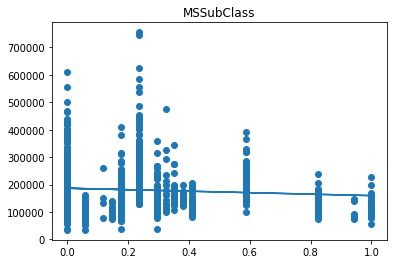

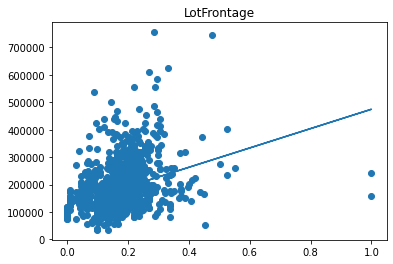

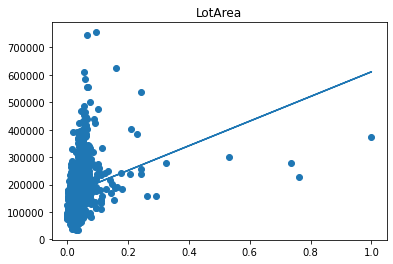

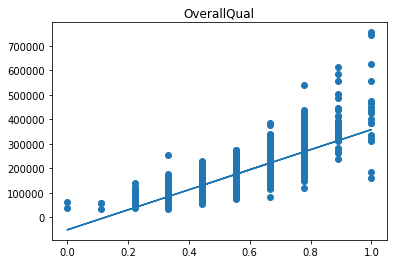

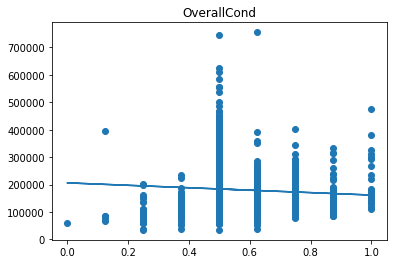

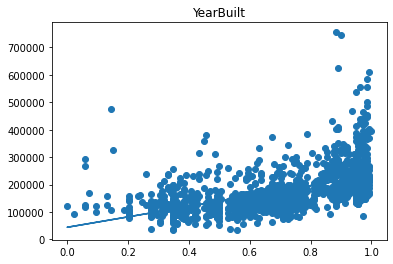

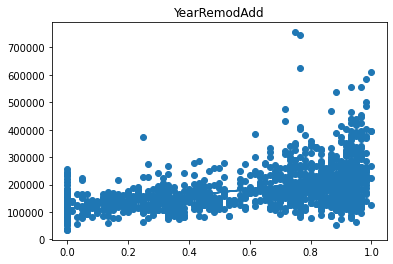

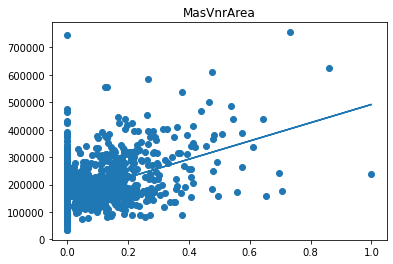

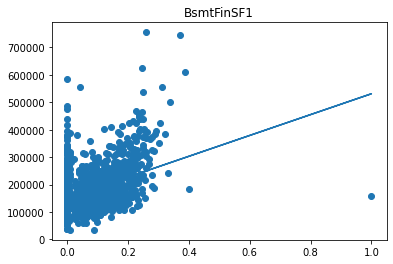

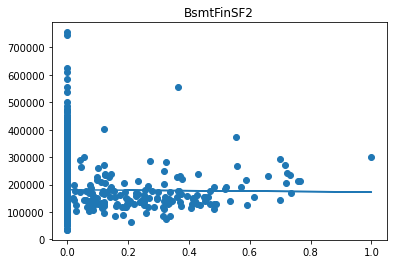

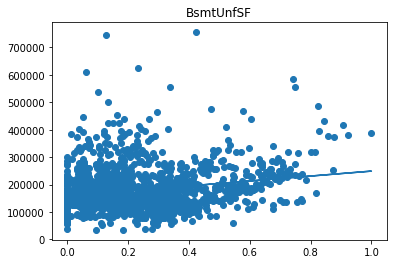

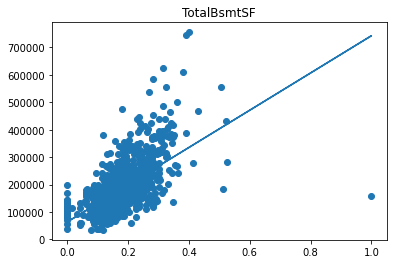

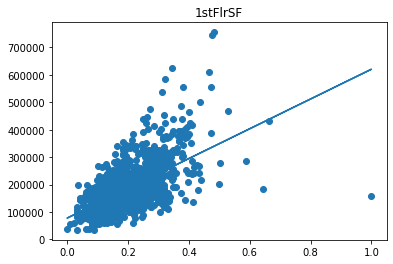

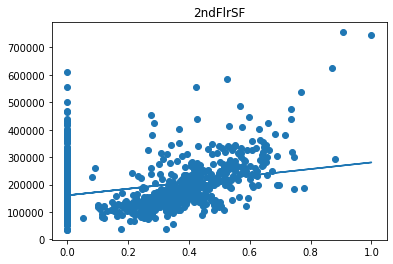

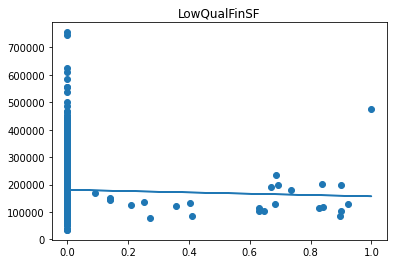

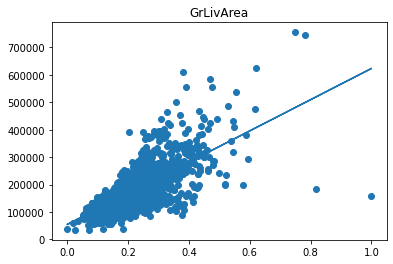

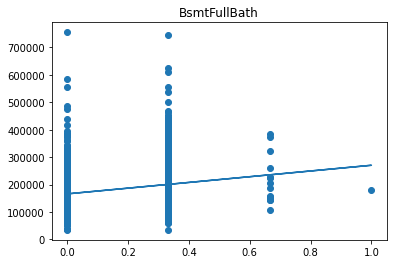

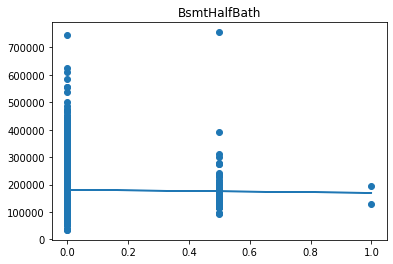

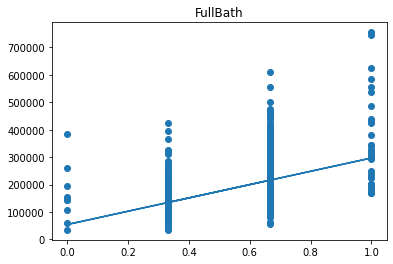

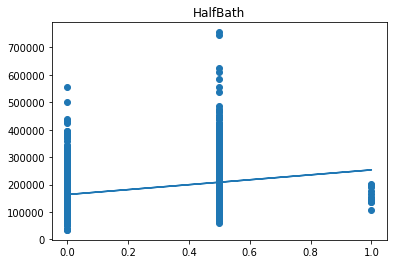

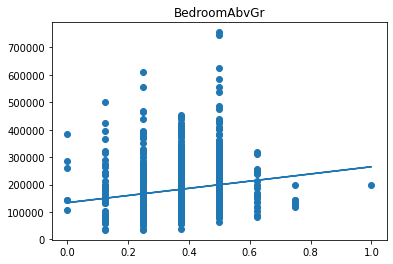

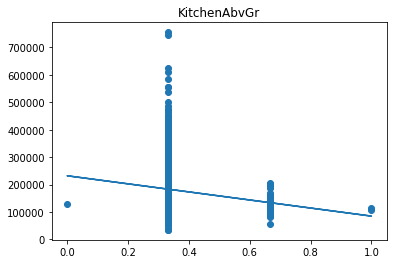

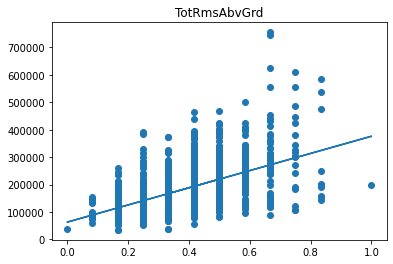

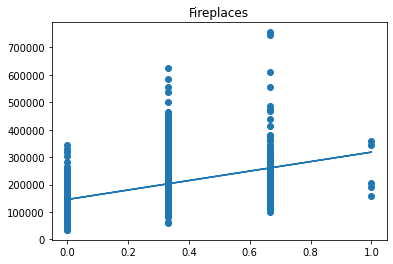

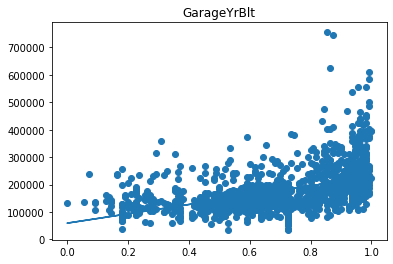

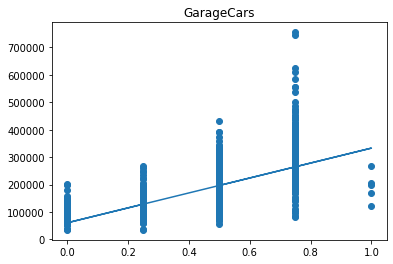

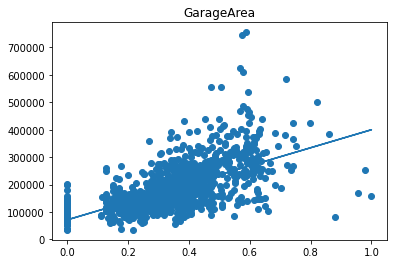

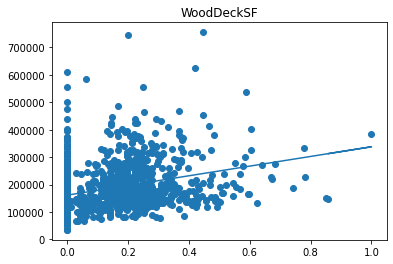

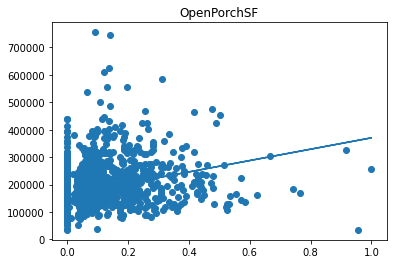

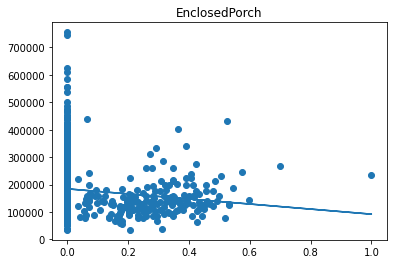

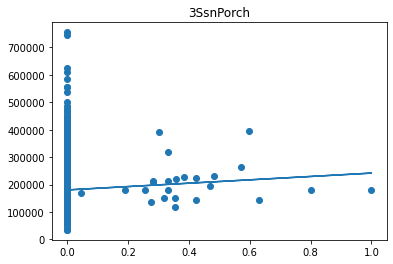

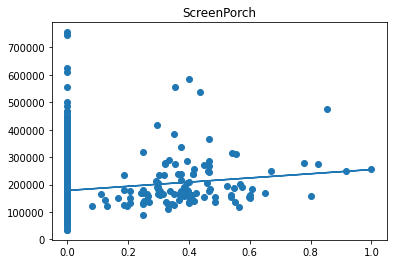

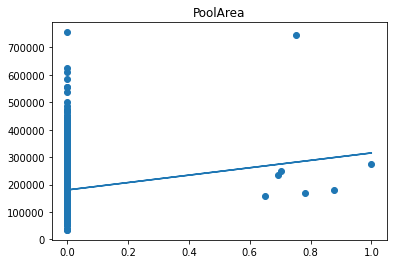

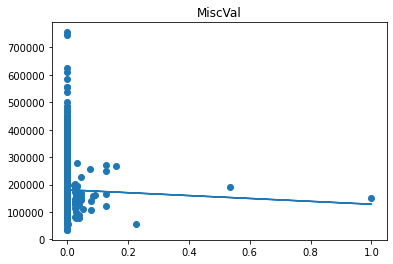

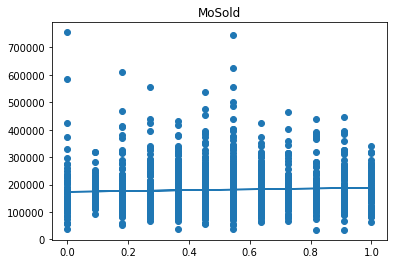

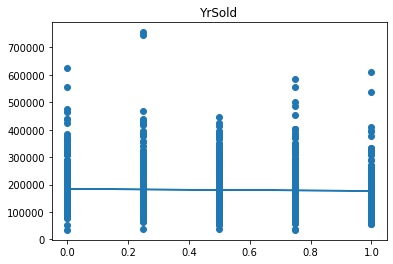

In [81]:
for var in numeric:
    scatterplot(var)

##### Train Test Split

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.4)

In [84]:
x_train.shape, x_test.shape

((876, 270), (584, 270))

In [85]:
y_train.shape, y_test.shape

((876,), (584,))

### SVR

##### Using Permutation_Importance for Feature Selection

In [90]:
from sklearn.inspection import permutation_importance
from sklearn.svm import SVR

In [91]:
svr = SVR()

In [92]:
svr.fit(x_train, y_train)

SVR()

In [93]:
result = permutation_importance(svr, x_train, y_train)

In [94]:
result

{'importances_mean': array([ 6.15401728e-07,  2.32140427e-07,  6.78527442e-08,  6.15573936e-06,
         4.62470000e-07,  8.25072067e-06,  1.89455809e-05,  6.42390836e-07,
         1.59045428e-07,  3.98221225e-08,  9.22389637e-07,  6.77863565e-07,
         1.00597711e-06,  1.88038886e-06,  1.16919941e-07,  1.87323625e-06,
         4.72392529e-07,  1.72233392e-07,  6.48302426e-06,  3.13144581e-06,
         1.20719293e-07,  1.58431468e-07,  1.96883360e-06,  4.62896909e-06,
         6.62935790e-06,  7.32918459e-06,  3.87197869e-06,  8.83537605e-07,
         6.89277007e-07,  2.09561982e-07,  5.60571579e-08,  1.18276405e-07,
        -1.03667461e-07,  2.17061273e-08, -3.33188189e-08,  2.16051681e-07,
         9.55842174e-09,  2.70418228e-07,  1.16694559e-07,  6.01829366e-06,
         7.05487713e-06,  1.03563565e-08,  1.03563565e-08,  5.74331658e-06,
         3.32870781e-08, -4.78084117e-08,  8.91315555e-06,  1.21930947e-06,
        -1.55638190e-07,  2.13338658e-07,  6.31002546e-07,  1.095304

In [95]:
best_features = []
for i in result.importances_mean.argsort()[::-1]:
    if result.importances_mean[i] - 2 * result.importances_std[i] > 0:
        best_features.append(x_train.columns[i])
        print(f"{x_train.columns[i]:<8}"
              f"{result.importances_mean[i]:.3f}"
              f" +/- {result.importances_std[i]:.3f}")

ExterQual_TA0.000 +/- 0.000
GarageFinish_Unf0.000 +/- 0.000
Foundation_PConc0.000 +/- 0.000
KitchenQual_TA0.000 +/- 0.000
BsmtQual_TA0.000 +/- 0.000
ExterQual_Gd0.000 +/- 0.000
HeatingQC_Ex0.000 +/- 0.000
KitchenQual_Gd0.000 +/- 0.000
Foundation_CBlock0.000 +/- 0.000
YearRemodAdd0.000 +/- 0.000
BsmtFinType1_GLQ0.000 +/- 0.000
BsmtQual_Gd0.000 +/- 0.000
HeatingQC_TA0.000 +/- 0.000
GarageType_Detchd0.000 +/- 0.000
MasVnrType_None0.000 +/- 0.000
GarageFinish_Fin0.000 +/- 0.000
Exterior1st_VinylSd0.000 +/- 0.000
Exterior2nd_VinylSd0.000 +/- 0.000
BsmtExposure_No0.000 +/- 0.000
GarageType_Attchd0.000 +/- 0.000
LotShape_Reg0.000 +/- 0.000
HouseStyle_2Story0.000 +/- 0.000
YearBuilt0.000 +/- 0.000
GarageCars0.000 +/- 0.000
GarageFinish_RFn0.000 +/- 0.000
MSZoning_RM0.000 +/- 0.000
GarageYrBlt0.000 +/- 0.000
FullBath0.000 +/- 0.000
OverallQual0.000 +/- 0.000
MSZoning_RL0.000 +/- 0.000
LotShape_IR10.000 +/- 0.000
Neighborhood_NAmes0.000 +/- 0.000
MasVnrType_BrkFace0.000 +/- 0.000
Fireplaces0.000

In [96]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [97]:
len(best_features)

155

In [100]:
n_features = range(5, 61)
scores = []
r2s = []
for n in n_features:
    f_list = [best_features[i] for i in range(n)]
    svr = SVR()
    svr.fit(x_train[f_list], y_train)
    y_predictions = svr.predict(x_test[f_list])
    mse = mean_squared_error(y_test, y_predictions)
    rmse = math.sqrt(mse)
    scores.append(rmse)
    svr_r2 = r2_score(y_test, y_predictions)
    r2s.append(svr_r2)

Text(0, 0.5, 'RMSE')

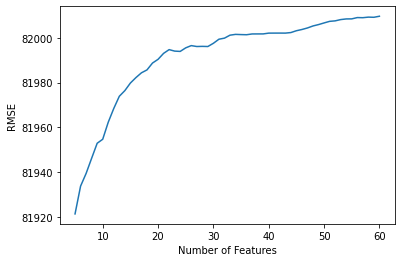

In [101]:
plt.plot(n_features, scores)
plt.xlabel('Number of Features')
plt.ylabel('RMSE')

Text(0, 0.5, 'R2 Scores')

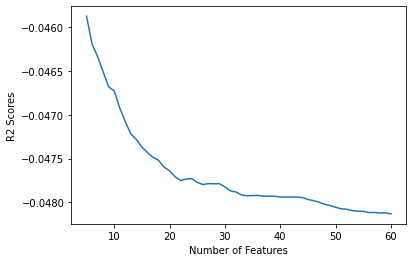

In [102]:
plt.plot(n_features, r2s)
plt.xlabel('Number of Features')
plt.ylabel('R2 Scores')

As the plots of the RMSE and R2 scores show, the more features that are added to the model, the worse the model does. This begins to level out some as 60 features used is approached, but the trend is clear.

This model does much worse than the SGDRegressor. The SGDRegressor actually performed fairly well.

##### SVR with Sigmoid Function

In [103]:
scores = []
r2s = []
for n in n_features:
    f_list = [best_features[i] for i in range(n)]
    svr = SVR(kernel = 'sigmoid')
    svr.fit(x_train[f_list], y_train)
    y_predictions = svr.predict(x_test[f_list])
    mse = mean_squared_error(y_test, y_predictions)
    rmse = math.sqrt(mse)
    scores.append(rmse)
    svr_r2 = r2_score(y_test, y_predictions)
    r2s.append(svr_r2)

Text(0, 0.5, 'RMSE')

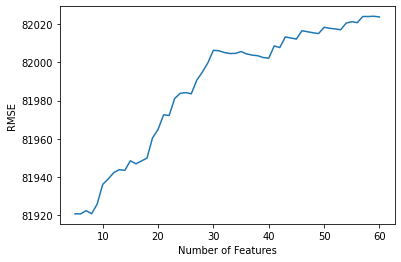

In [104]:
plt.plot(n_features, scores)
plt.xlabel('Number of Features')
plt.ylabel('RMSE')

Text(0, 0.5, 'R2 Scores')

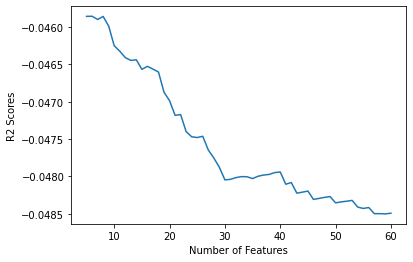

In [105]:
plt.plot(n_features, r2s)
plt.xlabel('Number of Features')
plt.ylabel('R2 Scores')

Changing the function used to sigmoid did not change much about the results.

##### SVR with Poly Function

In [106]:
scores = []
r2s = []
for n in n_features:
    f_list = [best_features[i] for i in range(n)]
    svr = SVR(kernel = 'poly')
    svr.fit(x_train[f_list], y_train)
    y_predictions = svr.predict(x_test[f_list])
    mse = mean_squared_error(y_test, y_predictions)
    rmse = math.sqrt(mse)
    scores.append(rmse)
    svr_r2 = r2_score(y_test, y_predictions)
    r2s.append(svr_r2)

Text(0, 0.5, 'RMSE')

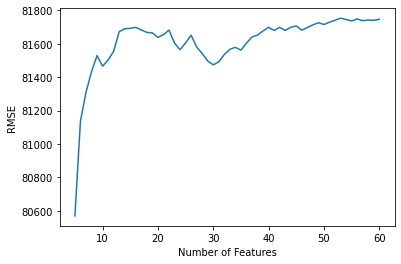

In [107]:
plt.plot(n_features, scores)
plt.xlabel('Number of Features')
plt.ylabel('RMSE')

Text(0, 0.5, 'R2 Scores')

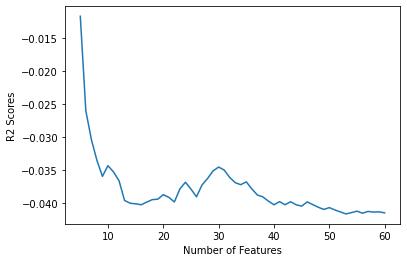

In [108]:
plt.plot(n_features, r2s)
plt.xlabel('Number of Features')
plt.ylabel('R2 Scores')

Changing the function to poly made the model perform worse. The decline in R2 and rise in RMSE are much sharper as seen in the plots of the scores above.